In [1]:
import pandas as pd

In [2]:

dataset = pd.read_csv('Energy Meter.csv' ,names = [ 'Voltage ' , 'Current' , 'Power' , 'class'])

In [3]:
dataset

,Voltage,Current,Power,class
0,0.0000,0.000000,0.000000,NoLoad
1,0.0000,0.000000,0.000000,NoLoad
2,0.0000,0.000000,0.000000,NoLoad
3,0.0000,0.000000,0.000000,NoLoad
4,0.0000,0.000000,0.000000,NoLoad
...,...,...,...,...
395,214.2647,0.847530,181.595761,Risk
396,214.6480,0.850669,182.594400,Risk
397,215.0313,0.850669,182.920461,Risk
398,211.9649,0.850669,180.311970,Risk


In [4]:
print(dataset.shape)

(400, 4)


In [5]:
from pandas.plotting import scatter_matrix 
from matplotlib import pyplot

Text(0.5, 1.0, 'Bar Plot')

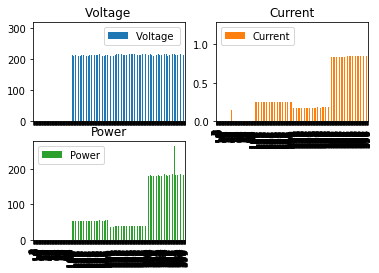

In [6]:
dataset.plot (kind = 'bar' ,subplots = True  ,layout = (2 ,2))
pyplot.title ('Bar Plot')


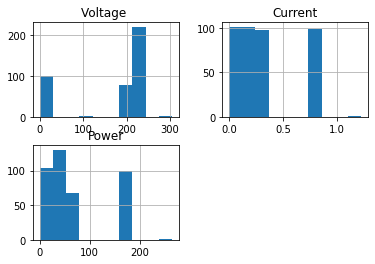

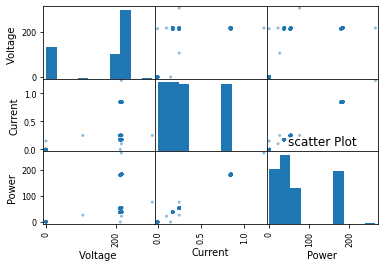

In [7]:
dataset.hist()
pyplot.title ('PIE Plot')
pyplot.show()

scatter_matrix(dataset)
pyplot.title ('scatter Plot')
pyplot.show()


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [9]:
arry = dataset.values
x= arry[ : , 0 : 3]
y= arry[ : , 3]
x_train , x_vaildation , y_train , y_vaildation = train_test_split(x,y ,test_size = 0.020 , random_state = 1 ,shuffle = True)  
 

In [12]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.997436 (0.007692)
LDA: 0.994936 (0.010129)
KNN: 0.994872 (0.010256)
CART: 0.997436 (0.007692)
NB: 0.987308 (0.012694)
SVM: 0.989808 (0.012484)


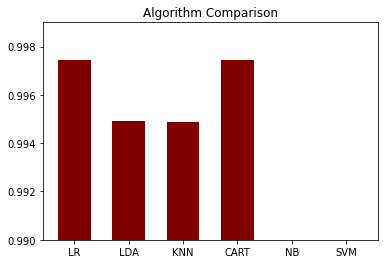

In [13]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

pyplot.ylim(.990, .999)
pyplot.bar(names, res, color ='maroon', width = 0.6)

pyplot.title('Algorithm Comparison')
pyplot.show() 